# 김기범 데이터 시각화

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv("../data/test.csv")

print("train shape >>", train_df.shape)
print("test shape >>", test_df.shape)

train shape >> (52530, 8)
test shape >> (9107, 6)


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52530 entries, 0 to 52529
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        52530 non-null  object
 1   input_text                52530 non-null  object
 2   label_text                52530 non-null  object
 3   target                    52530 non-null  int64 
 4   predefined_news_category  52530 non-null  object
 5   annotations               52530 non-null  object
 6   url                       52530 non-null  object
 7   date                      52530 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [16]:
train_df.head()

,ID,input_text,label_text,target,predefined_news_category,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,3,IT과학,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,생활문화,3,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,3,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
3,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회,2,IT과학,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
4,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회,2,IT과학,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54


# 1. target 분포 보기

In [19]:
train_df['label_text'].value_counts()

label_text
세계      9501
스포츠     8833
정치      8473
경제      7084
생활문화    6608
IT과학    6052
사회      5979
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='Count'>

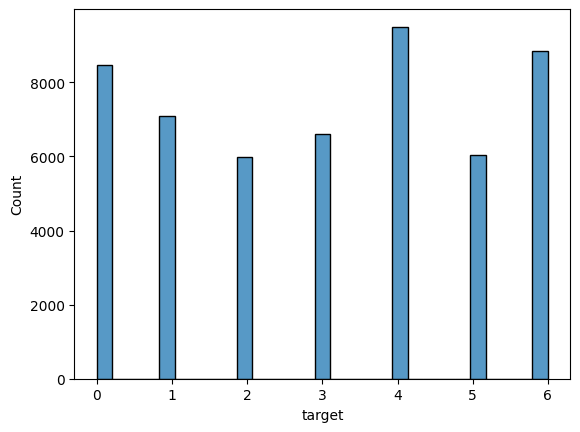

In [18]:
sns.histplot(data=train_df, x='target')

# 2. target-predefined target 비교

In [47]:
no_match_df = train_df[train_df['label_text'] != train_df['predefined_news_category']]

no_match_df.shape

(10089, 8)

In [52]:
no_match_groupby = no_match_df[['ID', 'label_text', 'predefined_news_category']].groupby(['label_text', 'predefined_news_category']).count()
no_match_groupby

ID
label_text predefined_news_category      
IT과학       경제                         174
           사회                          38
           생활문화                        86
           세계                          79
           스포츠                         40
           정치                          60
경제         IT과학                      1279
           사회                          42
           생활문화                       124
           세계                         195
           스포츠                         62
           정치                         135
사회         IT과학                      1306
           경제                         975
           생활문화                       678
           세계                         237
           스포츠                        112
           정치                         801
생활문화       IT과학                       285
           경제                         166
           사회                         198
           세계                         135
           스포츠                         56
           정치                         103
세계         IT과학                       236
           경제                         202
           사회                          46
           생활문화                       188
           스포츠                        210
           정치                         373
스포츠        IT과학                       122
           경제                          71
           사회                          32
           생활문화                        96
           세계                          66
           정치                         156
정치         IT과학                       182
           경제                         122
           사회                         162
           생활문화                        86
           세계                         297
           스포츠                         76

In [65]:
kor2eng = {k: v for k, v in zip(
    ['정치', '경제', '사회', '생활문화', '세계', 'IT과학', '스포츠'],
    ['Politics', 'Economy', 'Society', 'Culture', 'World', 'IT/Science', 'Sport']
    )
}

kor2eng

{'정치': 'Politics',
 '경제': 'Economy',
 '사회': 'Society',
 '생활문화': 'Culture',
 '세계': 'World',
 'IT과학': 'IT/Science',
 '스포츠': 'Sport'}

In [70]:
db = {
    k: {
        'labels': [], 'values': []
    } for k in kor2eng.values()
}

db

{'Politics': {'labels': [], 'values': []},
 'Economy': {'labels': [], 'values': []},
 'Society': {'labels': [], 'values': []},
 'Culture': {'labels': [], 'values': []},
 'World': {'labels': [], 'values': []},
 'IT/Science': {'labels': [], 'values': []},
 'Sport': {'labels': [], 'values': []}}

In [71]:
for i in range(len(no_match_groupby)):
    row = no_match_groupby.iloc[i]
    key = kor2eng[row.name[0]]
    db[key]['labels'].append(kor2eng[row.name[1]])
    db[key]['values'].append(row.values[0])



{'Politics': {'labels': ['IT/Science',
   'Economy',
   'Society',
   'Culture',
   'World',
   'Sport'],
  'values': [182, 122, 162, 86, 297, 76]},
 'Economy': {'labels': ['IT/Science',
   'Society',
   'Culture',
   'World',
   'Sport',
   'Politics'],
  'values': [1279, 42, 124, 195, 62, 135]},
 'Society': {'labels': ['IT/Science',
   'Economy',
   'Culture',
   'World',
   'Sport',
   'Politics'],
  'values': [1306, 975, 678, 237, 112, 801]},
 'Culture': {'labels': ['IT/Science',
   'Economy',
   'Society',
   'World',
   'Sport',
   'Politics'],
  'values': [285, 166, 198, 135, 56, 103]},
 'World': {'labels': ['IT/Science',
   'Economy',
   'Society',
   'Culture',
   'Sport',
   'Politics'],
  'values': [236, 202, 46, 188, 210, 373]},
 'IT/Science': {'labels': ['Economy',
   'Society',
   'Culture',
   'World',
   'Sport',
   'Politics'],
  'values': [174, 38, 86, 79, 40, 60]},
 'Sport': {'labels': ['IT/Science',
   'Economy',
   'Society',
   'Culture',
   'World',
   'Politics'